In [1]:
#Some test to exxtract stanford dataset
#!pip install dash-leaflet
#!pip install obspy
#!pip install dash-extensions
#!pip install librosa
#!pip install dash-bootstrap-components
#!pip install geopy

In [2]:
#!pip install dash-extensions==0.0.65

In [3]:
import pandas as pd
import numpy as np

#df_test = pd.read_csv("csvs/chunk5.csv")
df_test = pd.read_csv("csvs/earthquake_metadata.csv",low_memory=False)

df_test.set_index('trace_name',inplace= True)

In [4]:
df_test = df_test.dropna(subset=['source_distance_km', 'source_latitude','source_longitude'])

In [5]:
df_test = df_test[df_test['trace_category'] == 'earthquake_local']


In [6]:
#df_test.to_csv("csvs/earthquake_metadata_cleaned.csv")

In [7]:
min(df_test['source_distance_km'])

df_test_closest = df_test[df_test['source_distance_km'] == min(df_test['source_distance_km'])]

In [8]:
min(df_test['source_distance_km'])

0.0

In [9]:
df_test_closest

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
AAM1.ZQ_20070612064429_EV,ZQ,AAM1,HH,-26.427000,27.423000,1169.9,1251.5,autopicker,0.93,3.86,...,ml,None,None,0.00000,0.0,180.0,[40.40000153 39.20000076 39.79999924],[[2854.]],2007-06-12 06:44:30.745000,earthquake_local
UWE.HV_20160517062043_EV,HV,UWE,HH,19.420972,-155.291162,1252.0,800.0,manual,0.65,2.23,...,md,None,None,0.00003,0.0,351.1,[33.90000153 36.29999924 38.29999924],[[1968.]],2016-05-17 06:20:44.100000,earthquake_local


import h5py
hf = h5py.File('chunk5.hdf5', 'r', libver='earliest')

In [10]:
#eread = pd.read_hdf('chunk5.hdf5')

#hf['Folder'].attrs.keys()

#ee = hf.get('data/HPC.NC_20130403221010_EV')
ee = hf.get('data/KAN08.GS_20150408005359_EV')


## Amplitude normalization init test

In [11]:
import librosa
import soundfile as sf
#Extract the proper seismic instrument
#index: 0: north-south, 1: east-west, 2:vertical
def create_seismic_sound(x, index = 0):
    x1 = x[:,index]
    norm_x = x1 = x1/x1.std()
    norm_x_resampled = norm_x.resample(8000)
    #norm_x_resampled = librosa.resample(norm_x, 100, 8000)
    sf.write('assets/extracted_seismic_sound.wav',norm_x_resampled,8000)

    return norm_x_resampled

In [12]:
import librosa
import soundfile as sf
#Extract the proper seismic instrument
#index: 0: north-south, 1: east-west, 2:vertical
def create_seismic_sound_to_dash(x):
    print('Read')
    x1 = x.data
    print('Normalize')
    norm_x =  x1/x1.std()
    print('Resample')
    #norm_x_resampled = norm_x.resample(8000)
    norm_x_resampled = librosa.resample(norm_x, x.stats.sampling_rate, 8000)
    print('Export')
    #norm_x_resampled = librosa.resample(norm_x, 100, 8000)
    sf.write('assets/extracted_seismic_sound.wav',norm_x_resampled,8000)

    return norm_x_resampled

In [13]:
 

import librosa
import soundfile as sf
#Extract the proper seismic instrument
#index: 0: north-south, 1: east-west, 2:vertical
def create_seismic_sound_to_dash_bytes(x):
    print('Read')
    x1 = x.data
    print('Normalize')
    norm_x =  x1/x1.std()
    print('Resample')
    #norm_x_resampled = norm_x.resample(8000)
    norm_x_resampled = librosa.resample(norm_x, x.stats.sampling_rate, 8000)
    print('Export')
    out_audio = BytesIO()
    #norm_x_resampled = librosa.resample(norm_x, 100, 8000)
    sf.write(out_audio,norm_x_resampled,8000,format = 'wav')

    #import base64 
    #encoded=base64.b64encode(open("file.wav").read())
    

    #encoded=base64.b64encode(norm_x_resampled).decode("ascii").replace("\n", "")
    out_audio.seek(0)
    encoded=base64.b64encode(out_audio.read()).decode("ascii").replace("\n", "")
    
    #encoded.see
    

    #print(encoded)

    return "data:audio/wav;base64,{}".format(encoded)

    #return out_audio

In [14]:
#o_file = create_seismic_sound_to_dash_bytes(wave)

create_seismic_sound(ee,2)

x1 = ee[:,2]
norm_test = x1 = x1/x1.std()

norm_test = np.array(norm_test * (1<<15), dtype=np.int16)
audio_segment = pydub.AudioSegment(
    norm_test.tobytes(), 
    frame_rate=100,
    sample_width=norm_test.dtype.itemsize, 
    channels=1
)

audio_segment = audio_segment.set_frame_rate(8000)

audio_segment.export('pydub_seismic_test.wav', format='wav')

import soundfile as sf

sf.write('test_raw_waveform_normalized_upsampled.wav', seismic_resample, 8000)
#sf.write('test_raw_waveform_normalized.wav', norm_test, 100)
#sf.write('test_raw_waveform.wav', ee[:,2], 100)

Build up velocity
https://docs.obspy.org/contents.html

In [15]:
import obspy
#import h5py
from obspy import UTCDateTime
import numpy as np
from obspy.clients.fdsn.client import Client
import matplotlib.pyplot as plt

def make_stream(dataset):
    '''
    input: hdf5 dataset
    output: obspy stream

    '''
    data = np.array(dataset)

    tr_E = obspy.Trace(data=data[:, 0])
    tr_E.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_E.stats.delta = 0.01
    tr_E.stats.channel = dataset.attrs['receiver_type']+'E'
    tr_E.stats.station = dataset.attrs['receiver_code']
    tr_E.stats.network = dataset.attrs['network_code']

    tr_N = obspy.Trace(data=data[:, 1])
    tr_N.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_N.stats.delta = 0.01
    tr_N.stats.channel = dataset.attrs['receiver_type']+'N'
    tr_N.stats.station = dataset.attrs['receiver_code']
    tr_N.stats.network = dataset.attrs['network_code']

    tr_Z = obspy.Trace(data=data[:, 2])
    tr_Z.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_Z.stats.delta = 0.01
    tr_Z.stats.channel = dataset.attrs['receiver_type']+'Z'
    tr_Z.stats.station = dataset.attrs['receiver_code']
    tr_Z.stats.network = dataset.attrs['network_code']

    stream = obspy.Stream([tr_E, tr_N, tr_Z])

    return stream


client = Client("IRIS")
inventory = client.get_stations(network=df_test_closest['network_code'][0],
                                station=df_test_closest['receiver_code'][0],
                                starttime=UTCDateTime(df_test_closest['trace_start_time'][0]),
                                endtime=UTCDateTime(df_test_closest['trace_start_time'][0]) + 60,
                                loc="*", 
                                channel="*",
                                level="response")  


In [16]:
df_test_closest['network_code'][0]

'ZQ'

In [17]:
df_test_closest['receiver_code'][0]

'AAM1'

In [18]:

client = Client("IRIS")
wave = client.get_waveforms(network=df_test_closest['network_code'][0],
                            station=df_test_closest['receiver_code'][0],
                            starttime=UTCDateTime(df_test_closest['trace_start_time'][0]),
                                endtime=UTCDateTime(df_test_closest['trace_start_time'][0]) + 60,
                                location = "*",
                                channel = "*"
)

In [19]:
#http://eqseis.geosc.psu.edu/cammon/HTML/Classes/IntroQuakes/Notes/seismometers.html

In [20]:
st =  wave
#make_stream(ee)
#st = st.remove_response(inventory=inventory, output='VEL', plot=False) 

# ploting the verical component
#make_plot(st[2], title='Velocity', ylab='meters/second')

Compression, amplitude normalization:
https://librosa.org/doc/main/generated/librosa.effects.time_stretch.html
https://superkogito.github.io/blog/rmsnormalization.html

https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html

In [21]:
#st.write('seismic_sound_test.wav',format = 'WAV',framerate = 100)

https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html

In [22]:
from io import BytesIO
import base64
def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    #return encoded
    return "data:image/png;base64,{}".format(encoded)

In [23]:
from io import BytesIO
import base64
from scipy import signal
def spectrogram_to_uri(input_data, close_all=True, **save_args):    
    #todo: maybe we might be able to make a bytewriter approach, which is easier, and can be used for seismic plot and spectrograms at once
    
    f, t, Sxx = signal.spectrogram(input_data.filter("highpass", freq=0.5).data, input_data.stats.sampling_rate)
    plt.pcolormesh(t, f, np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')


    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    plt.savefig(out_img, format='png', **save_args)
    if close_all:
        plt.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    #return encoded
    return "data:image/png;base64,{}".format(encoded)

In [24]:
import matplotlib.pyplot as plt

filtered_spectrogram.savefig('test_specgram.png')

plt.plot(ee[:,2])

E,N,Z channels

import librosa
import librosa.display
#TODO: convert to spectrogram
fig, ax = plt.subplots()
#S = librosa.feature.melspectrogram(y=ee[:,1], sr=100, n_mels=128,fmax=50)

#S_dB = librosa.power_to_db(np.abs(S), ref=np.max)
#S_dB = librosa.power_to_db(np.abs(librosa.stft(y=ee[:,0])), ref=np.max)
S_dB = librosa.power_to_db(np.abs(Sxx), ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                               y_axis='mel', sr=100,
                               fmax=100, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

filtered_spectrogram = fig

In [25]:
df_test['time'] = pd.to_datetime(df_test['trace_start_time'], infer_datetime_format=True)
df_test['source_depth_km'] = pd.to_numeric(df_test['source_depth_km'],errors='coerce')
df_test['source_magnitude'] = pd.to_numeric(df_test['source_magnitude'],errors='coerce')
#df_test['source_magnitude'].sort_values()
#df_test.head(2)

In [26]:
def extract_waveform(client, event_record):
    #print(event_record)
    print(event_record['network_code'])
    print(event_record['receiver_code'])
    print(UTCDateTime(event_record['time']))

    wave = client.get_waveforms(network=event_record['network_code'],
                            station=event_record['receiver_code'],
                            starttime=UTCDateTime(event_record['time']),
                                endtime=UTCDateTime(event_record['time']) + 60,
                                location = "*",
                                channel = "*")

    
    #temprorarily extract only one stream
    return wave[0]

In [27]:
stations_df = pd.read_csv('station_definitions_from_metadata.csv')

In [28]:
selected_event = df_test.loc['HPC.NC_20130403221010_EV']

selected_event = df_test.loc['KAN08.GS_20150408005359_EV']

provider_of_waveform = stations_df[(stations_df['network_name'] == selected_event['network_code']) &  (stations_df['station_name'] == selected_event['receiver_code'])]
clien = provider_of_waveform['provider'].tolist()[0]

In [29]:
clien

'IRIS'

In [30]:
provider_of_waveform

,Unnamed: 0,provider,network_name,station_name,latitude,longitude,station_opened,station_closed
1232,0,IRIS,GS,KAN08,37.22672,-97.970947,2014-08-21T16:00:00.000000Z,NaN


In [31]:
wave_test = extract_waveform(client, selected_event)

GS
KAN08
2015-04-08T00:54:00.800000Z


Read
Normalize
Resample


C:\Users\Andras\anaconda3\envs\interdisciplinary_leaflet\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Pass orig_sr=200.0, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if sys.path[0] == '':


Export


C:\Users\Andras\anaconda3\envs\interdisciplinary_leaflet\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


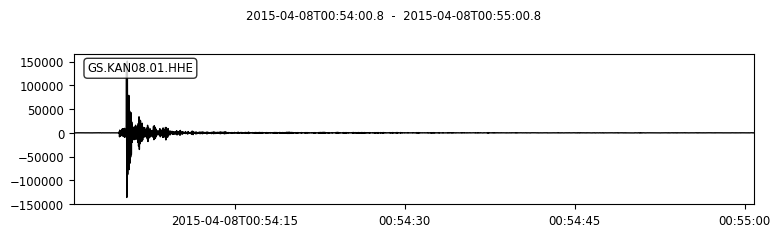

In [32]:
o_file = create_seismic_sound_to_dash_bytes(wave_test)
spectrogram_plot = spectrogram_to_uri(wave_test)

base_seismogram = fig_to_uri(wave_test.plot())

In [33]:
#df_test = df_test[['time','source_depth_km','source_magnitude','trace_name','source_latitude','source_longitude','trace_category']]
#df_test = df_test[['time','source_depth_km','source_magnitude','source_latitude','source_longitude','trace_category']]

In [34]:
info_colnames = ['trace_name','location','latitude','longitude','event_recorded_at','earthquake_depth','earthquake_magnitude']
#info_colnames = ['trace_name','latitude','longitude','event_recorded_at','earthquake_depth','earthquake_magnitude']
def create_event_infos(x):
    #'time','source_depth_km','source_magnitude','trace_name','source_latitude','source_longitude','trace_category'
    #selected_record = df_test.loc[x['trace_name']]
    selected_record = df_test.loc[x]
    latitude = str(selected_record['source_latitude'])
    longitude = str(selected_record['source_longitude'])
    address_details = ['road','county','state', 'country']
    try:
        location = geolocator.reverse(latitude + "," + longitude).raw
        location_string = str()
        for a in address_details:
            try:
                location_string += location['address'][a]
                location_string += ', '

            except KeyError:
                pass
        
        location_string = location_string[:-2]
    except AttributeError:
        location_string = "N/A"


    #print(location)
    info_dict = dict()
    info_dict['trace_name'] = x
    info_dict['location'] = location_string
    info_dict['latitude'] = latitude
    info_dict['longitude'] = longitude
    info_dict['event_recorded_at'] = str(selected_record['time'])
    info_dict['earthquake_depth'] = f'{selected_record["source_depth_km"]} km'
    info_dict['earthquake_magnitude'] = f'{selected_record["source_magnitude"]} km'

    return pd.DataFrame.from_dict(info_dict, orient='index').reset_index().to_dict('records')
    

selected_event = create_event_infos('HPC.NC_20130403221010_EV')
selected_event

df_test.head(5).to_dict('records')

Extract the minimum depth, magnitude, recording times etcc

In [35]:
#Latitudes and longitudes
site_lat = df_test.source_latitude
site_lon = df_test.source_longitude
hover_desc = 'Timestamp: ' +  str(df_test.time) + '<br>Category: ' + df_test.trace_category
#hover_desc = f'Time of registration: {df_earthquake_detections.trace_start_time} <br> Category: {df_earthquake_detections.trace_category}'
#time = df_earthquake_detections.trace_start_time
#ctg =df_earthquake_detections.trace_category
#locations_name = df.text
#min timestamp
#Extract timestamp range
min_date = min(df_test['time']).date()
max_date = max(df_test['time']).date()
#Extract minimum and maximum depth
min_depth = min(df_test['source_depth_km'])
max_depth = max(df_test['source_depth_km'])
#Extract minimum and maximum magnitude
min_magnitude = min(df_test['source_magnitude'])
max_magnitude = max(df_test['source_magnitude'])

depth_space = np.linspace(start=min_depth,stop=max_depth,num=8,endpoint=True,dtype=np.float64)
magnitude_space = np.linspace(start=min_magnitude,stop=max_magnitude,num=8,endpoint=True,dtype=np.float64)

In [49]:
stations_df = pd.read_csv('station_definitions_from_metadata.csv')
stations_df.drop(columns = 'Unnamed: 0',inplace = True)

In [50]:
stations_df

,provider,network_name,station_name,latitude,longitude,station_opened,station_closed
0,BGR,GR,BUG,51.441200,7.270700,1991-09-01T00:00:00.000000Z,NaN
1,BGR,GR,CLL,51.308030,13.002380,1993-04-01T00:00:00.000000Z,NaN
2,BGR,GR,CLZ,51.842900,10.374100,1991-02-01T00:00:00.000000Z,NaN
3,BGR,GR,GRA1,49.690776,11.220436,1976-02-17T00:00:00.000000Z,NaN
4,BGR,GR,GRA2,49.654107,11.358088,1976-02-17T00:00:00.000000Z,NaN
...,...,...,...,...,...,...,...
3288,USP,ON,VAS01,-22.280081,-43.442624,2011-09-14T00:00:00.000000Z,NaN
3289,USP,II,AAK,42.637500,74.494200,1990-10-12T00:00:00.000000Z,NaN
3290,USP,II,KIV,43.955300,42.686300,1994-02-01T00:00:00.000000Z,NaN
3291,USP,II,PALK,7.272800,80.702200,2000-08-22T00:00:00.000000Z,NaN


In [52]:
import dash_leaflet.express as dlx  
def stations_df_to_geojson(x):
    #df_points = x[['trace_name','source_latitude','source_longitude']]
    df_points = x
    df_points_records_renamed = df_points.rename(columns = {'latitude' :'lat','longitude' :'lon'}).to_dict('records')
    return dlx.dicts_to_geojson(df_points_records_renamed)


In [57]:
stations_geojson = stations_df_to_geojson(stations_df.head(10))

In [58]:

def dataframe_to_geojson(x):
    df_points = x.reset_index()[['trace_name','source_latitude','source_longitude']]
    df_points_records_renamed = df_points.rename(columns = {'source_latitude' :'lat','source_longitude' :'lon'}).to_dict('records')
    return dlx.dicts_to_geojson(df_points_records_renamed)


In [59]:
#df_points = df_test.reset_index()[['trace_name','time','source_depth_km','source_magnitude','source_latitude','source_longitude']]
df_points = df_test.reset_index()[['trace_name','source_latitude','source_longitude','source_magnitude']]
df_points = df_test.head(20).reset_index()[['trace_name','source_latitude','source_longitude','source_magnitude']]
#df_points.rename(columns={'trace_name':'name'})
#.head(30)
df_points_records_renamed = df_points.rename(columns = {'source_latitude' :'lat','source_longitude' :'lon'}).to_dict('records')

In [60]:


data_points_geojson = dlx.dicts_to_geojson(df_points_records_renamed) 

data_points_geojson

In [62]:
#df_earthquake_detections


In [64]:
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash import Dash, html, dcc, Output, Input
from dash_extensions.javascript import assign
import dash_bootstrap_components as dbc
import dash_table
from geopy.geocoders import Nominatim

import base64
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

import dash_bootstrap_components as dbc
#from dash import  dash_table
import dash_table
from datetime import date
from dash.dependencies import Input,Output,State
from dash import callback_context
from geopy.geocoders import Nominatim
import dash_leaflet as dl
from dash_extensions.javascript import assign

geolocator = Nominatim(user_agent="geoapiExercises")

colorscale = ['red', 'yellow', 'green', 'blue', 'purple']  # rainbow
chroma = "https://cdnjs.cloudflare.com/ajax/libs/chroma-js/2.1.0/chroma.min.js"  # js lib used for colors
color_prop = 'source_magnitude'
colorbar = dl.Colorbar(colorscale=colorscale, width=20, height=150, min=min_magnitude, max=max_magnitude, unit='km')
# Geojson rendering logic, must be JavaScript as it is executed in clientside.
point_to_layer = assign("""function(feature, latlng, context){
    const {min, max, colorscale, circleOptions, colorProp} = context.props.hideout;
    const csc = chroma.scale(colorscale).domain([min, max]);  // chroma lib to construct colorscale
    circleOptions.fillColor = csc(feature.properties[colorProp]);  // set color based on color prop.
    return L.circleMarker(latlng, circleOptions);  // sender a simple circle marker.
}""")


draw_antenna = assign("""function(feature, latlng){
const flag = L.icon({iconUrl: `icons/antenna_img.png`, iconSize: [64, 48]});
return L.marker(latlng, {icon: flag});
}""")

#https://fonts.google.com/icons?selected=Material%20Icons%3Asettings_input_antenna%3A

#geojson_filter = assign("function(feature, context){return context.props.hideout.includes(feature.properties.trace_name);}")
#default_available_earthquake_forms = df_test.index.tolist()
app = Dash(external_scripts=[chroma], prevent_initial_callbacks=True)

app.layout = html.Div([dbc.Row([

                                #Filters|
                                html.Div(style={'width':'20%','marginLeft': 5, 'marginRight': 10,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},
                                         children = [
                                            #html.Div([
                                            # dcc.Graph: maybe define somehow here?
                                            #dcc.Graph(figure=fig, id='map-layout')]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,
                                            html.Div(style={ 'display': 'block','vertical-align':'middle'},
                                                     children = [
                                                        html.Div(id="state"), html.Div(id="capital"),
                                                        html.Br(),
                                                        html.H3('Select a date interval'),
                                                        html.Br(),
                                                    #Datepicker to filter for intervals
                                                        dcc.DatePickerRange(
                                                            id='date-filter',
                                                            #min_date_allowed=date(1993, 1, 10),
                                                            min_date_allowed=min_date,
                                                            max_date_allowed=max_date,
                                                            #max_date_allowed=date(2019, 9, 19),
                                                            initial_visible_month=min_date,
                                                            start_date=min_date,
                                                            end_date=max_date
                                                        )]),
                                            #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={ 'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake depth interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for depth
                                                dcc.RangeSlider(min = min_depth, max = max_depth,
                                                                id='depth-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in depth_space},
                                                                value=[min_depth, max_depth],
                                                                dots=False,
                                                                #step=
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                            )]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake magnitude interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for magnitudes
                                                dcc.RangeSlider(min = min_magnitude, max = max_magnitude,
                                                                id='magnitude-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in magnitude_space},
                                                                value=[min_magnitude, max_magnitude],
                                                                dots=False,
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                                                ),
                                                ]),
                                             html.Div(
                                                 style={'display': 'block','vertical-align':'middle'},
                                                 children = [
                                                             html.Button('Apply Filter', id='filter-apply-btn', n_clicks=0),
                                                             html.Button('Reset Filter', id='filter-reset-btn', n_clicks=0)
                                                             ]
                                             )
                                         ]),
                                #Map
                                html.Div(
                                        style={'width':'75%', 'marginRight': 5,'display':'inline-block',"border":"2px black solid"},                                        
                                        children = [dl.Map(children=[
                                                    dl.TileLayer(),
                                                    dl.GeoJSON(data = data_points_geojson,
                                                    #options=dict(filter=geojson_filter), 
                                                    #hideout=default_available_earthquake_forms ,
                                                    options=dict(pointToLayer=point_to_layer),  # how to draw points            
                                                    #hideout=dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=5),
                                                    hideout=dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                                    min=min_magnitude, max=max_magnitude, colorscale=colorscale),                                                    
                                                    cluster=True , zoomToBoundsOnClick=True,
                                                    superClusterOptions={"radius": 100},
                                                    
                                                    id ='earthquake_events_geojson'),
                                                    dl.GeoJSON(data=stations_geojson
                                                                , options=dict(pointToLayer=draw_antenna), zoomToBounds=True)
                                                ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map")])]

                                ),
                                dbc.Row(html.Div([
                    #Audio player
                    html.Div(style={'width':'40%','marginLeft': 5,'marginTop': 20, 'marginRight': 20,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},                            
                           children = [
                                     
                                     html.Audio(html.Source(src=f'/assets/test_raw_waveform_normalized_upsampled.wav',type='audio/wav'), controls=True, id = 'audio_player_main'), 
                                     dash_table.DataTable(id = 'event_info_table',style_header={'display':'none'}
                                      ,style_cell={"whiteSpace": "pre-line"}                                      
                                      ,data = create_event_infos('HPC.NC_20130403221010_EV')
                                      ,style_cell_conditional=[
                                        {'if': {'column_id': 'index'},
                                        'width': '20%'},
                                        {'if': {'column_id': '0'},
                                        'width': '80%'},
                                    ]
                                      ,columns=[{"name": i, "id": i} for i in ['index','0']])
                                      ]),                         
                    html.Div(style={'width':'50%', 'marginRight': 10 ,'marginTop': 20, 'display':'inline-block',"border":"2px black solid"},                             
                             children = [
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'seismogram-div',
                                          children = [html.Img(id ='seismogram_img', src = base_seismogram)]),                                        
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'spectrogram-div',
                                          children = [html.Img( id ='spectrogram_img',src = spectrogram_plot)])
                                        ])]))
                                ])



@app.callback(
    #Output(component_id='tbl', component_property='data'), #Output will be the table (later map)
    Output(component_id='depth-slider', component_property= 'value'),
    Output(component_id='magnitude-slider', component_property= 'value'),
    Output(component_id='date-filter', component_property= 'start_date'),
    Output(component_id='date-filter', component_property= 'end_date'),
    Output(component_id='earthquake_events_geojson', component_property= 'data'),
    Output(component_id='map', component_property= 'style'),
    Input(component_id='filter-apply-btn', component_property='n_clicks'), #Input button triggers the callback
    Input(component_id='filter-reset-btn', component_property='n_clicks'), #Input button triggers the callback
    State(component_id='depth-slider', component_property= 'value'),
    State(component_id='magnitude-slider', component_property= 'value'),
    State(component_id='date-filter', component_property= 'start_date'),
    State(component_id='date-filter', component_property= 'end_date')

)
def apply_filter(apply_click,reset_click, depth_value, magnitude_value,start_date,end_date):

    style_to_refresh={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}
    # https://towardsdatascience.com/multi-faceted-data-exploration-in-the-browser-using-leaflet-and-amcharts-f74d049d78d9
    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    if  clicked_element == 'filter-apply-btn':
        filter_records = df_test['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_test['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                         & df_test['source_depth_km'].between(depth_value[0],depth_value[1])
        df_filtered = df_test[filter_records]

        filtered_datapoints_geojson = dataframe_to_geojson(df_filtered)

        #filtered_wave_names =  df_filtered.index.tolist()

        

        #'earthquake_events_geojson'
        return [depth_value,magnitude_value,start_date,end_date,filtered_datapoints_geojson,style_to_refresh]
        #return [df_filtered.head(5).to_dict('records'),depth_value,magnitude_value,start_date,end_date]

    elif clicked_element == 'filter-reset-btn':
        return [[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date,data_points_geojson,style_to_refresh]
       # return [df_test.head(5).to_dict('records'),[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date]

    else:
        return dash.no_update


@app.callback(Output("event_info_table", "data"),
Output('seismogram_img', 'src'),
Output('spectrogram_img', 'src'), 
Output('audio_player_main', 'src'),
Output('audio_player_main', 'style'),
Input("earthquake_events_geojson", "click_feature"),
State('seismogram_img', 'src'),
State('spectrogram_img', 'src'),
State('audio_player_main', 'style')
)

def select_event(clicked_event, current_seismogram_image, current_spectrogram_image, audi_div_element):
    if clicked_event is not None and clicked_event['properties']['cluster'] is False:      
        #Find the corresponding record from metadata
        print('event selected')
        selected_trace_name = clicked_event['properties']['trace_name']
        table_data = create_event_infos(selected_trace_name)
        selected_event = df_test.loc[selected_trace_name]

        
        provider_of_waveform = stations_df[(stations_df['network_name'] == selected_event['network_code']) &  (stations_df['station_name'] == selected_event['receiver_code'])]
        try:
            client = Client(provider_of_waveform['provider'].tolist()[0])

            wave = extract_waveform(client, selected_event)

            spectrogram_plot = spectrogram_to_uri(wave)
            
            #wave.filter("highpass", freq=0.5).spectrogram(log = True)

            #seismic_plot = fig_to_uri(base_seismogram.plot())
            seismic_plot = fig_to_uri(wave.plot())

            print('seismic sound processing..')
            #create_seismic_sound_to_dash(wave)
            #create_seismic_sound_to_dash_bytes(wave)
            print('FINISHED')
            audio_src = html.Source(src=create_seismic_sound_to_dash_bytes(wave),type='audio/wav')
            audio_src = create_seismic_sound_to_dash_bytes(wave)
            #audio_player_div_player = html.Audio(children = audio_src, controls=True, id ='seismic_audio_player')
            audio_player_style = {}

            #audio_src = html.Source(src=f'/assets/extracted_seismic_sound.wav',type='audio/wav')
            

        except:
            print('data cannot be found')
            return dash.no_update
            #src = 
                                         #html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'filtered_seismogram-div', children = [html.Img(src = fig_to_uri(filtered_seismogram.plot()))]),
        #spectrogram_plot =  spectrogram_to_uri(st[2])
        

        return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style]

    else:
        return dash.no_update

'''
app.layout = html.Div([
    dl.Map(children=[
        dl.TileLayer(),
        dl.GeoJSON(data=geojson, options=dict(filter=geojson_filter), hideout=dd_defaults, id="geojson", zoomToBounds=True)
    ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map"),
    dcc.Dropdown(id="dd", value=dd_defaults, options=dd_options, clearable=False, multi=True)
])
'''
# Link drop down to geojson hideout prop (could be done with a normal callback, but clientside is more performant).
#app.clientside_callback("function(x){return x;}", Outp
# ut("geojson", "hideout"), Input("dd", "value"))

if __name__ == '__main__':
    #app.run_server()
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Select multiple elements?
#https://github.com/thedirtyfew/dash-leaflet/issues/45

import base64
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

import dash_bootstrap_components as dbc
#from dash import  dash_table
import dash_table
from datetime import date
from dash.dependencies import Input,Output,State
from dash import callback_context
from geopy.geocoders import Nominatim
import dash_leaflet as dl
from dash_extensions.javascript import assign
geolocator = Nominatim(user_agent="geoapiExercises")

info_colnames = ['trace_name','location','latitude','longitude','event_recorded_at','earthquake_depth','earthquake_magnitude']
#info_colnames = ['trace_name','latitude','longitude','event_recorded_at','earthquake_depth','earthquake_magnitude']
def create_event_infos(x):
    #'time','source_depth_km','source_magnitude','trace_name','source_latitude','source_longitude','trace_category'
    #selected_record = df_test.loc[x['trace_name']]
    selected_record = df_test.loc[x]
    latitude = str(selected_record['source_latitude'])
    longitude = str(selected_record['source_longitude'])
    address_details = ['road','county','state', 'country']
    try:
        location = geolocator.reverse(latitude + "," + longitude).raw
        location_string = str()
        for a in address_details:
            try:
                location_string += location['address'][a]
                location_string += ', '

            except KeyError:
                pass
        
        location_string = location_string[:-2]
    except AttributeError:
        location_string = "N/A"


    #print(location)
    info_dict = dict()
    info_dict['trace_name'] = x
    info_dict['location'] = location_string
    info_dict['latitude'] = latitude
    info_dict['longitude'] = longitude
    info_dict['event_recorded_at'] = str(selected_record['time'])
    info_dict['earthquake_depth'] = f'{selected_record["source_depth_km"]} km'
    info_dict['earthquake_magnitude'] = f'{selected_record["source_magnitude"]} km'

    return pd.DataFrame.from_dict(info_dict, orient='index').reset_index().to_dict('records')
    
    


#!!!!!!!!!!!!!https://github.com/Coding-with-Adam/Dash-by-Plotly/blob/master/Dash_Interactive_Graphs/Scatter_mapbox/recycling.py
app = dash.Dash()
#data_points_geojson
#geojson_filter = assign("function(feature, context){return context.props.hideout.includes(feature.properties.trace_name);}")
#default_available_earthquake_forms = df_test.head(1).index.tolist()

cities = [dict(name="Aalborg", lat=57.0268172, lon=9.837735),
          dict(name="Aarhus", lat=56.1780842, lon=10.1119354),
          dict(name="Copenhagen", lat=55.6712474, lon=12.5237848)]
# Create drop down options.
dd_options = [dict(value=c["name"], label=c["name"]) for c in cities]
dd_defaults = [o["value"] for o in dd_options]
cities = [dict(name="Aalborg", lat=57.0268172, lon=9.837735),
          dict(name="Aarhus", lat=56.1780842, lon=10.1119354),
          dict(name="Copenhagen", lat=55.6712474, lon=12.5237848)]
# Create drop down options.
dd_options = [dict(value=c["name"], label=c["name"]) for c in cities]
dd_defaults = [o["value"] for o in dd_options]
print(dd_defaults)
# Generate geojson with a marker for each city and name as tooltip.
geojson = dlx.dicts_to_geojson([{**c, **dict(tooltip=c['name'])} for c in cities])
# Create javascript function that filters on feature name.
geojson_filter = assign("function(feature, context){return context.props.hideout.includes(feature.properties.name);}")
#print(dd_defaults)


image_filename = 'samples_for_wireframe/map_screenshot.PNG'
encoded_image = base64.b64encode(open(image_filename, 'rb').read())
#app.layout =html.Div([
app.layout = html.Div([dbc.Row([

                                #Filters|
                                html.Div(style={'width':'20%','marginLeft': 5, 'marginRight': 10,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},
                                         children = [
                                            #html.Div([
                                            # dcc.Graph: maybe define somehow here?
                                            #dcc.Graph(figure=fig, id='map-layout')]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,
                                            html.Div(style={ 'display': 'block','vertical-align':'middle'},
                                                     children = [
                                                        html.Div(id="state"), html.Div(id="capital"),
                                                        html.Br(),
                                                        html.H3('Select a date interval'),
                                                        html.Br(),
                                                    #Datepicker to filter for intervals
                                                        dcc.DatePickerRange(
                                                            id='date-filter',
                                                            #min_date_allowed=date(1993, 1, 10),
                                                            min_date_allowed=min_date,
                                                            max_date_allowed=max_date,
                                                            #max_date_allowed=date(2019, 9, 19),
                                                            initial_visible_month=min_date,
                                                            start_date=min_date,
                                                            end_date=max_date
                                                        )]),
                                            #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={ 'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake depth interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for depth
                                                dcc.RangeSlider(min = min_depth, max = max_depth,
                                                                id='depth-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in depth_space},
                                                                value=[min_depth, max_depth],
                                                                dots=False,
                                                                #step=
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                            )]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake magnitude interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for magnitudes
                                                dcc.RangeSlider(min = min_magnitude, max = max_magnitude,
                                                                id='magnitude-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in magnitude_space},
                                                                value=[min_magnitude, max_magnitude],
                                                                dots=False,
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                                                ),
                                                ]),
                                             html.Div(
                                                 style={'display': 'block','vertical-align':'middle'},
                                                 children = [
                                                             html.Button('Apply Filter', id='filter-apply-btn', n_clicks=0),
                                                             html.Button('Reset Filter', id='filter-reset-btn', n_clicks=0)
                                                             ]
                                             )
                                         ]),
                                #Map
                                html.Div(
                                        style={'width':'75%', 'marginRight': 5,'display':'inline-block',"border":"2px black solid"},                                        
                                        children = [dl.Map(children=[
                                                    dl.TileLayer(),
                                                    dl.GeoJSON(data=geojson, options=dict(filter=geojson_filter), hideout=dd_defaults, id="geojson", zoomToBounds=True)
                                                ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map"),
                                                
                                            dcc.Dropdown(id="dd", value=dd_defaults, options=dd_options, clearable=False, multi=True)])]
                                        #children = [dcc.Graph(figure=fig, id='map-layout')])]
                                        #children = [html.Img(src ='data:image/png;base64,{}'.format(encoded_image.decode()))])]
                                        #Todo: consider using bigger outzoom in the beginning, in order to have quicker loading
                                        #children = [dl.Map(children = [dl.TileLayer()
                                        #,dl.GeoJSON(data=geojson, options=dict(filter=geojson_filter), hideout=dd_defaults, id="earthquake_events_geojson", zoomToBounds=True)
                                        #], style={'width': '1000px', 'height': '500px'})])]
                                        #dl.GeoJSON(data = data_points_geojson, cluster=True , zoomToBoundsOnClick=True, options = dict(filter=geojson_filter),
                                        #dl.GeoJSON(data = geojson
                                        #,
                                        # cluster=True ,
                                        # zoomToBoundsOnClick=True, options = dict(filter=geojson_filter),
                                        # hideout = dd_defaults,
                                        #    ,superClusterOptions={"radius": 100},
                                        #d ='earthquake_events_geojson')
                                        #], style={'width': '1000px', 'height': '500px'})])]
                                        #, style={'width': '1000px', 'height': '500px'})])]
                                        #children = [ dash_table.DataTable(data = df_test.head(5).to_dict('records'),columns=[{"name": i, "id": i} for i in df_test.columns], id='tbl')])]
                                ),
                dbc.Row(html.Div([
                    #Audio player
                    html.Div(style={'width':'40%','marginLeft': 5,'marginTop': 20, 'marginRight': 20,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},
                             #children = [html.Audio(src='/assets/test_raw_waveform_normalized.wav', controls=True)]),
                             #children = [html.Audio(html.Source(src=f"https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav",
                           #type="audio/wav"), controls=True)]),
                           children = [
                                     #html.Div(id = 'audio_player_div', style={'display':'inline-block'}, children =[]),
                                     #!!!! that one is the best below
                                     #html.Audio(src = None, controls=True, id = 'audio_player_main'), 
                                     html.Audio(html.Source(src=f'/assets/test_raw_waveform_normalized_upsampled.wav',type='audio/wav'), controls=True, id = 'audio_player_main'), 
                                     #html.Source(src=f"https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav",
                                        #type="audio/wav")
                           
                                      dash_table.DataTable(id = 'event_info_table',style_header={'display':'none'}
                                      ,style_cell={"whiteSpace": "pre-line"}
                                      
                                      ,data = create_event_infos('HPC.NC_20130403221010_EV')
                                      ,style_cell_conditional=[
                                        {'if': {'column_id': 'index'},
                                        'width': '20%'},
                                        {'if': {'column_id': '0'},
                                        'width': '80%'},
                                    ]
                                      ,columns=[{"name": i, "id": i} for i in ['index','0']])]),
                           #dash_table.DataTable(data = create_event_infos('HPC.NC_20130403221010_EV'),columns=[{"name": i, "id": i} for i in info_colnames], id='event_info_tbl')]),
#                           ]),
                                    #,dash_table.DataTable(data = create_event_infos('HPC.NC_20130403221010_EV'),columns=[{"name": i, "id": i} for i in info_colnames], id='event_info_tbl')]),

                    #Spectrogram
                    html.Div(style={'width':'50%', 'marginRight': 10 ,'marginTop': 20, 'display':'inline-block',"border":"2px black solid"},
                             #children = [html.Img(src='samples_for_wireframe/img.png')])]))])
                             children = [
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'seismogram-div',
                                          children = [html.Img(id ='seismogram_img', src = base_seismogram)]),
                                         #html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'filtered_seismogram-div', children = [html.Img(src = fig_to_uri(filtered_seismogram.plot()))]),
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'spectrogram-div',
                                          children = [html.Img( id ='spectrogram_img',src = spectrogram_plot)])
                                         #html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'spectrogram-div', children = [html.Img(src = fig_to_uri(filtered_spectrogram))])                                                                                                                        
                                        ])]))
                                        
                #,dbc.Row(html.Div(children = [html.Div(style={ 'display': 'block','vertical-align':'middle'},
                #                              children = [dash_table.DataTable(style_header={'display':'none'},data = create_event_infos('HPC.NC_20130403221010_EV'),columns=[{"name": i, "id": i} for i in ['index','0']])])]))                                    
                                              #children = [dash_table.DataTable(data = create_event_infos('HPC.NC_20130403221010_EV'),columns=[{"name": i, "id": i} for i in ['index','0']])])]))                                    
                                              #children = [dash_table.DataTable(data = df_test.head(1).to_dict('records'),columns=[{"name": i, "id": i} for i in df_test.columns])])]))                                    
                    ])

@app.callback(
    #Output(component_id='tbl', component_property='data'), #Output will be the table (later map)
    Output(component_id='depth-slider', component_property= 'value'),
    Output(component_id='magnitude-slider', component_property= 'value'),
    Output(component_id='date-filter', component_property= 'start_date'),
    Output(component_id='date-filter', component_property= 'end_date'),
    Output(component_id='earthquake_events_geojson', component_property= 'hideout'),
    Input(component_id='filter-apply-btn', component_property='n_clicks'), #Input button triggers the callback
    Input(component_id='filter-reset-btn', component_property='n_clicks'), #Input button triggers the callback
    State(component_id='depth-slider', component_property= 'value'),
    State(component_id='magnitude-slider', component_property= 'value'),
    State(component_id='date-filter', component_property= 'start_date'),
    State(component_id='date-filter', component_property= 'end_date')

)
def apply_filter(apply_click,reset_click, depth_value, magnitude_value,start_date,end_date):


    # https://towardsdatascience.com/multi-faceted-data-exploration-in-the-browser-using-leaflet-and-amcharts-f74d049d78d9
    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    if  clicked_element == 'filter-apply-btn':
        filter_records = df_test['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_test['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                         & df_test['source_depth_km'].between(depth_value[0],depth_value[1])
        df_filtered = df_test[filter_records]

        filtered_wave_names =  df_filtered.index.tolist()

        #'earthquake_events_geojson'
        return [depth_value,magnitude_value,start_date,end_date,filtered_wave_names]
        #return [df_filtered.head(5).to_dict('records'),depth_value,magnitude_value,start_date,end_date]

    elif clicked_element == 'filter-reset-btn':
        return [[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date,default_available_earthquake_forms]
       # return [df_test.head(5).to_dict('records'),[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date]

    else:
        return dash.no_update


@app.callback(Output("event_info_table", "data"),
Output('seismogram_img', 'src'),
Output('spectrogram_img', 'src'), 
Output('audio_player_main', 'src'),
Output('audio_player_main', 'style'),
Input("earthquake_events_geojson", "click_feature"),
State('seismogram_img', 'src'),
State('spectrogram_img', 'src'),
State('audio_player_main', 'style')
)

def select_event(clicked_event, current_seismogram_image, current_spectrogram_image, audi_div_element):
    if clicked_event is not None and clicked_event['properties']['cluster'] is False:      
        #Find the corresponding record from metadata
        selected_trace_name = clicked_event['properties']['trace_name']
        table_data = create_event_infos(selected_trace_name)
        selected_event = df_test.loc[selected_trace_name]

        
        provider_of_waveform = stations_df[(stations_df['network_name'] == selected_event['network_code']) &  (stations_df['station_name'] == selected_event['receiver_code'])]
        try:
            client = Client(provider_of_waveform['provider'].tolist()[0])

            wave = extract_waveform(client, selected_event)

            spectrogram_plot = spectrogram_to_uri(wave)
            
            #wave.filter("highpass", freq=0.5).spectrogram(log = True)

            #seismic_plot = fig_to_uri(base_seismogram.plot())
            seismic_plot = fig_to_uri(wave.plot())

            print('seismic sound processing..')
            #create_seismic_sound_to_dash(wave)
            #create_seismic_sound_to_dash_bytes(wave)
            print('FINISHED')
            audio_src = html.Source(src=create_seismic_sound_to_dash_bytes(wave),type='audio/wav')
            audio_src = create_seismic_sound_to_dash_bytes(wave)
            #audio_player_div_player = html.Audio(children = audio_src, controls=True, id ='seismic_audio_player')
            audio_player_style = {}

            #audio_src = html.Source(src=f'/assets/extracted_seismic_sound.wav',type='audio/wav')
            

        except:
            return dash.no_update
            #src = 
                                         #html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'filtered_seismogram-div', children = [html.Img(src = fig_to_uri(filtered_seismogram.plot()))]),
        #spectrogram_plot =  spectrogram_to_uri(st[2])
        

        return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style]

    else:
        return dash.no_update

        #Load the corresponding informations

        
         
        #some_message = str()
        #for k,v in feature['properties'].items():
        #    some_message += f'Key: {str(k)}'
        #    some_message += '  '
        #    some_message += f'Value: {str(v)}'

        #return f'{some_message}'
        #return f'{str(feature)}'
        #return f"You clicked {feature['properties']['trace_name']}"
        #return f"{df_test.loc[feature['properties']['trace_name']]}"

'''
selection of earthquake events on maps
First, selection in the table will be used as test for composition,
then refactor for map event selection
'''

#app.run_server(debug=True, use_reloader=False,dev_tools_hot_reload=False)  # Turn off reloader if inside Jupyter
app.run_server(debug=True, use_reloader=False)


In [ ]:
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash import Dash, html, dcc, Output, Input
from dash_extensions.javascript import assign

# A few cities in Denmark.
cities = [dict(name="Aalborg", lat=57.0268172, lon=9.837735),
          dict(name="Aarhus", lat=56.1780842, lon=10.1119354),
          dict(name="Copenhagen", lat=55.6712474, lon=12.5237848)]
# Create drop down options.
dd_options = [dict(value=c["name"], label=c["name"]) for c in cities]
dd_defaults = [o["value"] for o in dd_options]
print(dd_defaults)
# Generate geojson with a marker for each city and name as tooltip.
geojson = dlx.dicts_to_geojson([{**c, **dict(tooltip=c['name'])} for c in cities])
# Create javascript function that filters on feature name.
geojson_filter = assign("function(feature, context){return context.props.hideout.includes(feature.properties.name);}")
# Create example app.
app = Dash()
app.layout = html.Div([
    dl.Map(children=[
        dl.TileLayer(),
        dl.GeoJSON(data=geojson, options=dict(filter=geojson_filter), hideout=dd_defaults, id="geojson", zoomToBounds=True)
    ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map"),
    dcc.Dropdown(id="dd", value=dd_defaults, options=dd_options, clearable=False, multi=True)
])
# Link drop down to geojson hideout prop (could be done with a normal callback, but clientside is more performant).
#app.clientside_callback("function(x){return x;}", Output("geojson", "hideout"), Input("dd", "value"))

if __name__ == '__main__':
    app.run_server()

['Aalborg', 'Aarhus', 'Copenhagen']
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash import Dash, html, dcc, Output, Input
from dash_extensions.javascript import assign
import dash_bootstrap_components as dbc
import dash_table
from geopy.geocoders import Nominatim

import base64
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

import dash_bootstrap_components as dbc
#from dash import  dash_table
import dash_table
from datetime import date
from dash.dependencies import Input,Output,State
from dash import callback_context
from geopy.geocoders import Nominatim
import dash_leaflet as dl
from dash_extensions.javascript import assign

geolocator = Nominatim(user_agent="geoapiExercises")


geojson_filter = assign("function(feature, context){return context.props.hideout.includes(feature.properties.trace_name);}")
default_available_earthquake_forms = df_test.index.tolist()
app = Dash()

app.layout = html.Div([dbc.Row([

                                #Filters|
                                html.Div(style={'width':'20%','marginLeft': 5, 'marginRight': 10,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},
                                         children = [
                                            #html.Div([
                                            # dcc.Graph: maybe define somehow here?
                                            #dcc.Graph(figure=fig, id='map-layout')]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,
                                            html.Div(style={ 'display': 'block','vertical-align':'middle'},
                                                     children = [
                                                        html.Div(id="state"), html.Div(id="capital"),
                                                        html.Br(),
                                                        html.H3('Select a date interval'),
                                                        html.Br(),
                                                    #Datepicker to filter for intervals
                                                        dcc.DatePickerRange(
                                                            id='date-filter',
                                                            #min_date_allowed=date(1993, 1, 10),
                                                            min_date_allowed=min_date,
                                                            max_date_allowed=max_date,
                                                            #max_date_allowed=date(2019, 9, 19),
                                                            initial_visible_month=min_date,
                                                            start_date=min_date,
                                                            end_date=max_date
                                                        )]),
                                            #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={ 'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake depth interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for depth
                                                dcc.RangeSlider(min = min_depth, max = max_depth,
                                                                id='depth-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in depth_space},
                                                                value=[min_depth, max_depth],
                                                                dots=False,
                                                                #step=
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                            )]),
                                             #'width':'15%','marginLeft': 20, 'marginRight': 20,'marginTop':30,
                                            html.Div(
                                                style={'display': 'block','vertical-align':'middle'},
                                                children = [
                                                html.Br(),
                                                html.H3('Select earthquake magnitude interval ( in km)'),
                                                html.Br(),
                                                #slider to filter for magnitudes
                                                dcc.RangeSlider(min = min_magnitude, max = max_magnitude,
                                                                id='magnitude-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in magnitude_space},
                                                                value=[min_magnitude, max_magnitude],
                                                                dots=False,
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                                                ),
                                                ]),
                                             html.Div(
                                                 style={'display': 'block','vertical-align':'middle'},
                                                 children = [
                                                             html.Button('Apply Filter', id='filter-apply-btn', n_clicks=0),
                                                             html.Button('Reset Filter', id='filter-reset-btn', n_clicks=0)
                                                             ]
                                             )
                                         ]),
                                #Map
                                html.Div(
                                        style={'width':'75%', 'marginRight': 5,'display':'inline-block',"border":"2px black solid"},                                        
                                        children = [dl.Map(children=[
                                                    dl.TileLayer(),
                                                    dl.GeoJSON(data = data_points_geojson,
                                                    options=dict(filter=geojson_filter), 
                                                    hideout=default_available_earthquake_forms ,
                                                    cluster=True , zoomToBoundsOnClick=True,
                                                    superClusterOptions={"radius": 100},
                                                    id ='earthquake_events_geojson')
                                                ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map")])]

                                ),
                                dbc.Row(html.Div([
                    #Audio player
                    html.Div(style={'width':'40%','marginLeft': 5,'marginTop': 20, 'marginRight': 20,'display':'inline-block',"border":"2px black solid",'vertical-align': 'top'},                            
                           children = [
                                     
                                     html.Audio(html.Source(src=f'/assets/test_raw_waveform_normalized_upsampled.wav',type='audio/wav'), controls=True, id = 'audio_player_main'), 
                                     dash_table.DataTable(id = 'event_info_table',style_header={'display':'none'}
                                      ,style_cell={"whiteSpace": "pre-line"}                                      
                                      ,data = create_event_infos('HPC.NC_20130403221010_EV')
                                      ,style_cell_conditional=[
                                        {'if': {'column_id': 'index'},
                                        'width': '20%'},
                                        {'if': {'column_id': '0'},
                                        'width': '80%'},
                                    ]
                                      ,columns=[{"name": i, "id": i} for i in ['index','0']])
                                      ]),                         
                    html.Div(style={'width':'50%', 'marginRight': 10 ,'marginTop': 20, 'display':'inline-block',"border":"2px black solid"},                             
                             children = [
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'seismogram-div',
                                          children = [html.Img(id ='seismogram_img', src = base_seismogram)]),                                        
                                         html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'spectrogram-div',
                                          children = [html.Img( id ='spectrogram_img',src = spectrogram_plot)])
                                        ])]))
                                ])



@app.callback(
    #Output(component_id='tbl', component_property='data'), #Output will be the table (later map)
    Output(component_id='depth-slider', component_property= 'value'),
    Output(component_id='magnitude-slider', component_property= 'value'),
    Output(component_id='date-filter', component_property= 'start_date'),
    Output(component_id='date-filter', component_property= 'end_date'),
    Output(component_id='earthquake_events_geojson', component_property= 'hideout'),
    Input(component_id='filter-apply-btn', component_property='n_clicks'), #Input button triggers the callback
    Input(component_id='filter-reset-btn', component_property='n_clicks'), #Input button triggers the callback
    State(component_id='depth-slider', component_property= 'value'),
    State(component_id='magnitude-slider', component_property= 'value'),
    State(component_id='date-filter', component_property= 'start_date'),
    State(component_id='date-filter', component_property= 'end_date')

)
def apply_filter(apply_click,reset_click, depth_value, magnitude_value,start_date,end_date):


    # https://towardsdatascience.com/multi-faceted-data-exploration-in-the-browser-using-leaflet-and-amcharts-f74d049d78d9
    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    if  clicked_element == 'filter-apply-btn':
        filter_records = df_test['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_test['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                         & df_test['source_depth_km'].between(depth_value[0],depth_value[1])
        df_filtered = df_test[filter_records]

        filtered_wave_names =  df_filtered.index.tolist()

        #'earthquake_events_geojson'
        return [depth_value,magnitude_value,start_date,end_date,filtered_wave_names]
        #return [df_filtered.head(5).to_dict('records'),depth_value,magnitude_value,start_date,end_date]

    elif clicked_element == 'filter-reset-btn':
        return [[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date,default_available_earthquake_forms]
       # return [df_test.head(5).to_dict('records'),[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date]

    else:
        return dash.no_update


@app.callback(Output("event_info_table", "data"),
Output('seismogram_img', 'src'),
Output('spectrogram_img', 'src'), 
Output('audio_player_main', 'src'),
Output('audio_player_main', 'style'),
Input("earthquake_events_geojson", "click_feature"),
State('seismogram_img', 'src'),
State('spectrogram_img', 'src'),
State('audio_player_main', 'style')
)

def select_event(clicked_event, current_seismogram_image, current_spectrogram_image, audi_div_element):
    if clicked_event is not None and clicked_event['properties']['cluster'] is False:      
        #Find the corresponding record from metadata
        print('event selected')
        selected_trace_name = clicked_event['properties']['trace_name']
        table_data = create_event_infos(selected_trace_name)
        selected_event = df_test.loc[selected_trace_name]

        
        provider_of_waveform = stations_df[(stations_df['network_name'] == selected_event['network_code']) &  (stations_df['station_name'] == selected_event['receiver_code'])]
        try:
            client = Client(provider_of_waveform['provider'].tolist()[0])

            wave = extract_waveform(client, selected_event)

            spectrogram_plot = spectrogram_to_uri(wave)
            
            #wave.filter("highpass", freq=0.5).spectrogram(log = True)

            #seismic_plot = fig_to_uri(base_seismogram.plot())
            seismic_plot = fig_to_uri(wave.plot())

            print('seismic sound processing..')
            #create_seismic_sound_to_dash(wave)
            #create_seismic_sound_to_dash_bytes(wave)
            print('FINISHED')
            audio_src = html.Source(src=create_seismic_sound_to_dash_bytes(wave),type='audio/wav')
            audio_src = create_seismic_sound_to_dash_bytes(wave)
            #audio_player_div_player = html.Audio(children = audio_src, controls=True, id ='seismic_audio_player')
            audio_player_style = {}

            #audio_src = html.Source(src=f'/assets/extracted_seismic_sound.wav',type='audio/wav')
            

        except:
            print('data cannot be found')
            return dash.no_update
            #src = 
                                         #html.Div(style={ 'display': 'block','vertical-align':'middle'},id = 'filtered_seismogram-div', children = [html.Img(src = fig_to_uri(filtered_seismogram.plot()))]),
        #spectrogram_plot =  spectrogram_to_uri(st[2])
        

        return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style]

    else:
        return dash.no_update

'''
app.layout = html.Div([
    dl.Map(children=[
        dl.TileLayer(),
        dl.GeoJSON(data=geojson, options=dict(filter=geojson_filter), hideout=dd_defaults, id="geojson", zoomToBounds=True)
    ], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block"}, id="map"),
    dcc.Dropdown(id="dd", value=dd_defaults, options=dd_options, clearable=False, multi=True)
])
'''
# Link drop down to geojson hideout prop (could be done with a normal callback, but clientside is more performant).
#app.clientside_callback("function(x){return x;}", Outp
# ut("geojson", "hideout"), Input("dd", "value"))

if __name__ == '__main__':
    #app.run_server()
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
for d in default_available_earthquake_forms 



In [ ]:
type(data_points_geojson[list(data_points_geojson.keys())[0]])

str

In [ ]:
len(data_points_geojson)

2

In [ ]:
len(default_available_earthquake_forms )

200000

In [ ]:
default_available_earthquake_forms

['HPC.NC_20130403221010_EV',
 'HPC.NC_20130404025956_EV',
 'HPC.NC_20130405011141_EV',
 'HPC.NC_20130405093239_EV',
 'HPC.NC_20130407003202_EV']

In [ ]:
df_test

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,time
trace_name,,,,,,,,,,,,,,,,,,,,,
HPC.NC_20130403221010_EV,NC,HPC,EH,37.059933,-121.275780,468.0,800.0,manual,0.68,3.93000,...,None,None,0.2108,23.39,309.90,[46.5 42. 44.59999847],[[1680.]],2013-04-03 22:10:11.730000,earthquake_local,2013-04-03 22:10:11.730000
HPC.NC_20130404025956_EV,NC,HPC,EH,37.059933,-121.275780,468.0,500.0,manual,0.64,3.37000,...,None,None,0.1730,19.24,236.20,[25.79999924 22.29999924 27.39999962],[[1438.]],2013-04-04 02:59:57.870000,earthquake_local,2013-04-04 02:59:57.870000
HPC.NC_20130405011141_EV,NC,HPC,EH,37.059933,-121.275780,468.0,600.0,manual,0.66,4.20000,...,None,None,0.1910,21.12,186.30,[41.09999847 33.40000153 36.59999847],[[1464.]],2013-04-05 01:11:42.080000,earthquake_local,2013-04-05 01:11:42.080000
HPC.NC_20130405093239_EV,NC,HPC,EH,37.059933,-121.275780,468.0,1000.0,manual,0.38,3.38000,...,None,None,0.1739,19.30,235.40,[54.90000153 51.59999847 55.79999924],[[2195.]],2013-04-05 09:32:39.100000,earthquake_local,2013-04-05 09:32:39.100000
HPC.NC_20130407003202_EV,NC,HPC,EH,37.059933,-121.275780,468.0,700.0,manual,0.68,3.86000,...,None,None,0.1730,19.20,224.20,[27.60000038 18.70000076 18.70000076],[[1593.]],2013-04-07 00:32:03.310000,earthquake_local,2013-04-07 00:32:03.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAH.NN_20151206184041_EV,NN,PAH,HH,39.710602,-119.385399,1520.0,700.0,manual,0.95,10.65539,...,None,None,0.5550,61.76,61.27,[17.29999924 17.29999924 22.20000076],[[2872.]],2015-12-06 18:40:42.497390,earthquake_local,2015-12-06 18:40:42.497390
PAH.NN_20151206184806_EV,NN,PAH,HH,39.710602,-119.385399,1520.0,600.0,manual,0.95,8.85193,...,None,None,0.4560,50.78,256.94,[9.39999962 8. 8.39999962],[[3040.]],2015-12-06 18:48:07.362930,earthquake_local,2015-12-06 18:48:07.362930
PAH.NN_20151208145127_EV,NN,PAH,HH,39.710602,-119.385399,1520.0,700.0,manual,0.95,8.69025,...,None,None,0.4590,51.16,257.99,[26.5 27.20000076 27.79999924],[[2151.]],2015-12-08 14:51:28.524250,earthquake_local,2015-12-08 14:51:28.524250


In [ ]:
def create_event_infos(x):
    #'time','source_depth_km','source_magnitude','trace_name','source_latitude','source_longitude','trace_category'
    #selected_record = df_test.loc[x['trace_name']]
    selected_record = df_test.loc[x]
    latitude = str(selected_record['source_latitude'])
    longitude = str(selected_record['source_longitude'])
    address_details = ['road','county','state', 'country']
    try:
        location = geolocator.reverse(latitude + "," + longitude).raw
        location_string = str()
        for a in address_details:
            try:
                location_string += location['address'][a]
                location_string += ', '

            except KeyError:
                pass

    except AttributeError:
        location_string = "N/A"


    #print(location)
    info_dict = dict()
    info_dict['trace_name'] = x
    info_dict['location'] = location_string
    info_dict['latitude'] = latitude
    info_dict['longitude'] = longitude
    info_dict['event_recorded_at'] = str(selected_record['time'])
    info_dict['earthquake_depth'] = f'{selected_record["source_depth_km"]} km'
    info_dict['earthquake_magnitude'] = f'{selected_record["source_magnitude"]} km'

    return pd.DataFrame.from_dict(info_dict, orient='index').reset_index().to_dict('records')

In [ ]:
create_event_infos('HPC.NC_20130403221010_EV')

[{'index': 'trace_name', 0: 'HPC.NC_20130403221010_EV'},
 {'index': 'location',
  0: 'Rock House Ridge Trail<br>Santa Clara County<br>California<br>United States<br>'},
 {'index': 'latitude', 0: '37.19483'},
 {'index': 'longitude', 0: '-121.478'},
 {'index': 'event_recorded_at', 0: '2013-04-03 22:10:11.730000'},
 {'index': 'earthquake_depth', 0: '4.72 km'},
 {'index': 'earthquake_magnitude', 0: '1.9 km'}]

In [ ]:
create_event_infos('HPC.NC_20130403221010_EV')

[{'index': 'trace_name', 0: 'HPC.NC_20130403221010_EV'},
 {'index': 'location',
  0: 'Rock House Ridge Trail, Santa Clara County, California, United States'},
 {'index': 'latitude', 0: '37.19483'},
 {'index': 'longitude', 0: '-121.478'},
 {'index': 'event_recorded_at', 0: '2013-04-03 22:10:11.730000'},
 {'index': 'earthquake_depth', 0: '4.72 km'},
 {'index': 'earthquake_magnitude', 0: '1.9 km'}]

If we also want to load map, that need to be used

In [ ]:
create_seismic_sound_to_dash(wave)

Read
Normalize
Resample


<ipython-input-183-031103ebb872>:12: FutureWarning:

Pass orig_sr=200.0, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error



Export


array([-0.04705812, -0.04779273, -0.04847994, ...,  0.04331925,
        0.03305539,  0.02323088])

In [ ]:
wave

6 Trace(s) in Stream:
GS.KAN08.01.HHE | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples
GS.KAN08.01.HHN | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples
GS.KAN08.01.HHZ | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples
GS.KAN08.01.HNE | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples
GS.KAN08.01.HNN | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples
GS.KAN08.01.HNZ | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples

In [ ]:
wave = extract_waveform(client, selected_event)

GS
KAN08
2015-04-08T00:54:00.800000Z


In [ ]:
wave

GS.KAN08.01.HHE | 2015-04-08T00:54:00.800000Z - 2015-04-08T00:55:00.800000Z | 200.0 Hz, 12001 samples